# Evaluation of 1D Movement with Euler Algorithm

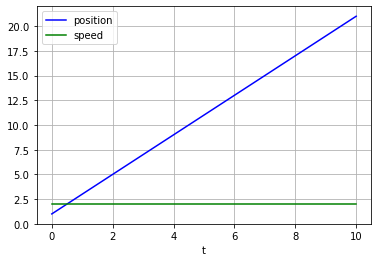

In [131]:
from scipy.integrate import odeint, solve_ivp
import numpy as np


def trainEquation(X,t):
    position, speed = X

    dXdt = [speed,0]

    return dXdt

X0 = [1, 2]
t= np.linspace(0, 10, 101)

sol = odeint(trainEquation,X0,t)


import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='position')
plt.plot(t, sol[:, 1], 'g', label='speed')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


[[1.00000000e+00 1.11315550e+00 3.14156385e+00 1.21790893e+01
  5.38987081e+01 2.53113766e+02 1.22170390e+03 5.97308326e+03
  2.19978158e+04]
 [2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
  2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
  2.00000000e+00]]


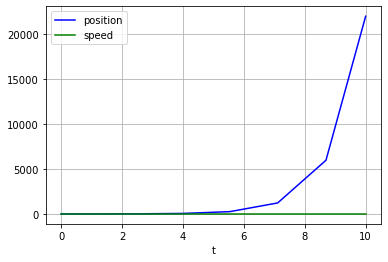

In [132]:
def trainEquation2(t,X):
    
    position, speed = X

    dXdt = [position,0]

    return dXdt

sol = solve_ivp(trainEquation2,[0,10],X0)
print(sol.y)

import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y[0, :], 'b', label='position')
plt.plot(sol.t, sol.y[1, :], 'g', label='speed')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [133]:
from cProfile import label
import numpy as np
import sdeint
import matplotlib.pyplot as plt
from tqdm import trange

from matplotlib.ticker import MultipleLocator
%matplotlib inline


n= 10000
dt = 0.1
sig = 0.01

rng = np.random.default_rng(seed=42)

def integrate_model(A, W,GG,X0, t):


    B = np.diag([0,sig])

    def f(x, t):
        return A.dot(x)

    def G(x, t):
        return B

    X = sdeint.itoint(f, G, X0, tspan,generator=rng)

    #Measurement equation

    # create measurement noise
    noise = np.random.multivariate_normal(mean=[0,0], cov = [[0,0], [0,0]],size=tspan.size)

    Y = GG * X


    return X



A = np.array([[0 ,1],[0,0]])
W= [0,0.1] 
G = np.array([[1,0],[0,1]])
tspan = np.arange(0,1000,step=dt)

X0 = np.array([0.0 , 10])

result = integrate_model(A,W,G,X0,tspan)

fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot()


plt.plot(tspan, result[:,1],label="speed")

plt.gca().xaxis.set_major_locator(MultipleLocator(200))
plt.gca().xaxis.set_minor_locator(MultipleLocator(50))


plt.grid(axis='both', which='major', color='0.80',linestyle='-')
plt.grid(axis='both',which='minor', color='0.85',linestyle=':')

plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")


#plt.plot(tspan, result[:,0],label="position")
plt.legend(title="Legend")

ValueError: operands could not be broadcast together with shapes (2,2) (10000,2) 

In [ ]:
from cProfile import label
import numpy as np
import sdeint
import matplotlib.pyplot as plt
from tqdm import trange

from matplotlib.ticker import MultipleLocator
%matplotlib inline


n= 10000
dt = 0.1
sig = 0.01

rng = np.random.default_rng(seed=42)

def integrate_model(A, W,GG,X0, t):


    B = np.diag([0,sig])

    def f(x, t):
        return A.dot(x)

    def G(x, t):
        return B

    X = sdeint.itoint(f, G, X0, tspan,generator=rng)

    #Measurement equation

    # create measurement noise
    noise = np.random.multivariate_normal(mean=[0], cov = [0.01],size=tspan.size)

    Y = GG * X


    return X



A = np.array([[0 ,1],[0,0]])
W= [0,0.1] 
G = np.array([[1,0],[0,1]])
tspan = np.arange(0,1000,step=dt)

X0 = np.array([0.0 , 10])

result = integrate_model(A,W,G,X0,tspan)

fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot()


plt.plot(tspan, result[:,1],label="speed")

plt.gca().xaxis.set_major_locator(MultipleLocator(200))
plt.gca().xaxis.set_minor_locator(MultipleLocator(50))


plt.grid(axis='both', which='major', color='0.80',linestyle='-')
plt.grid(axis='both',which='minor', color='0.85',linestyle=':')

plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")


#plt.plot(tspan, result[:,0],label="position")
plt.legend(title="Legend")


ValueError: operands could not be broadcast together with shapes (2,2) (10000,2) 

(1000, 1)


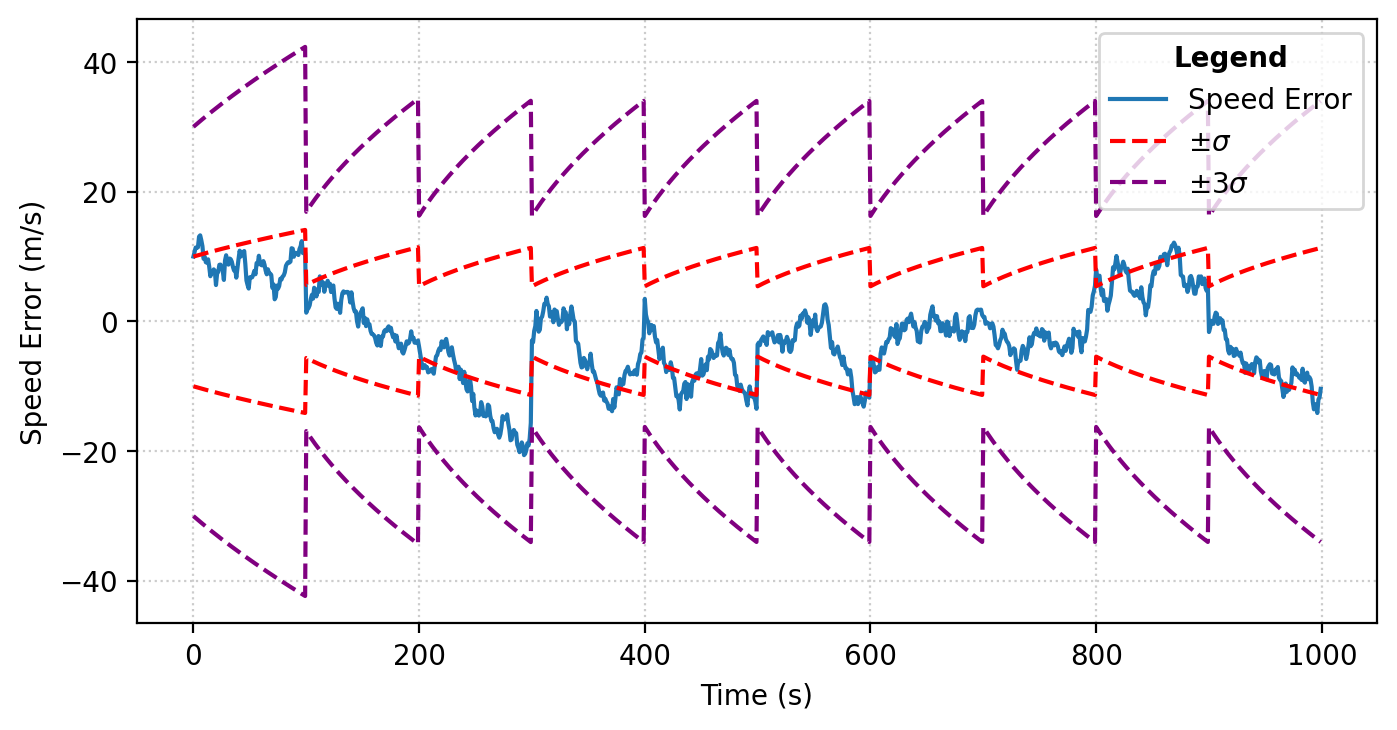

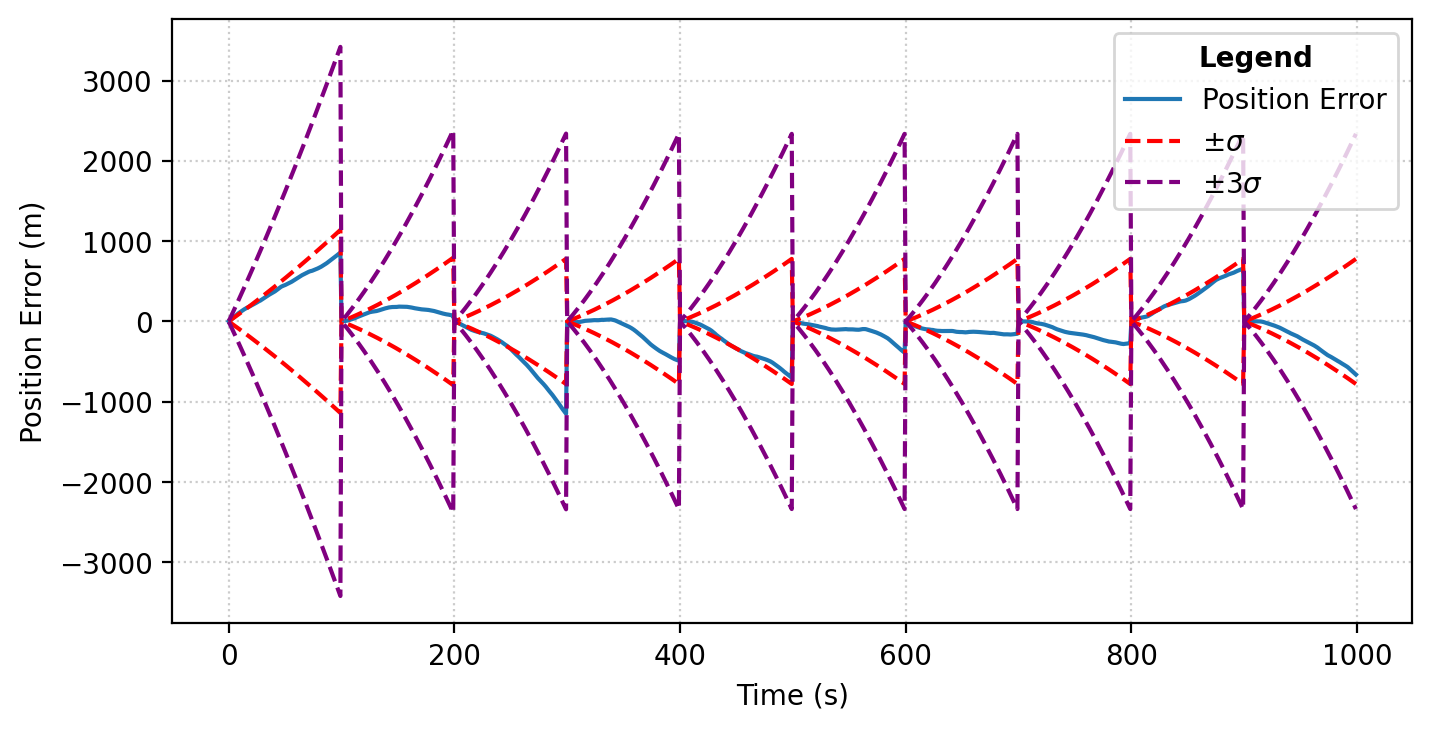

In [179]:
from cProfile import label
import numpy as np
import sdeint
import matplotlib.pyplot as plt
from tqdm import trange
import scipy

from matplotlib.ticker import MultipleLocator
%matplotlib inline


n= 10
dt = 1
sig = 1
sig_mesure = 1

tspan = np.arange(0,1000,step=dt)

H = np.array([[1,0]])

#rng = np.random.default_rng(seed=42)




def integrate_model(A, W,GG,X0, t):


    B = np.diag([0,sig**2])

    def f(x, t):
        return A.dot(x)

    def G(x, t):
        return B

    X = sdeint.itoint(f, G, X0, tspan,generator=rng)

    #Measurement equation

    # create measurement noise
    noise = np.random.multivariate_normal(mean=[0], cov = [[sig_mesure**2]],size=tspan.size)


    

    def myfunction(a):

        sel = H.dot(a.reshape(-1, 1))


        return np.squeeze(a)

    Y = np.array([H@(xi) for xi in X]) + noise


    return X,Y



A = np.array([[0 ,1],[0,0]])
W= [0,0.1] 
G = np.array([[1,0],[0,1]])

X0 = np.array([0.0 , 10]) # to column vector

# INTEGRATION DE LA VERITE
Xv,Yv = integrate_model(A,W,G,X0,tspan)

print(Yv.shape)


# Boucle du filtre

Fv = scipy.linalg.expm(A*dt)


P0 = np.diag([2**2,10**2])
x0f = np.array([0,0])


sigc = np.sqrt(np.diag(P0))

sigt = sigc
# sigc = np.row_stack((sigc,sigc))
# sigc = np.row_stack((sigc,sigc))

# print(sigc)

Xf = x0f

Pc = P0
Xc = x0f.reshape(-1, 1)


Q = np.diag([0,sig**1])*dt

R = np.diag([[sig_mesure**2]])


for idx in np.arange(1,tspan.size):

    Pc = Fv@(Pc@Fv.T) + Q
    Xc = Fv.dot(Xc)

    
    Z = Yv[idx,:].reshape(-1, 1)


    #recalage

    if np.mod(idx,100)==0:

        kf = (Pc@H.T)@ np.linalg.inv(H@(Pc@H.T)+R)

        rho = np.eye(2)-kf@H

        Xc = Xc + kf@(Z-H@Xc)

        Pc      = rho @( Pc @ rho.T) + kf@( R * kf.T)




    #SAVE

    sigc = np.sqrt(np.diag(Pc))

    sigt = np.row_stack((sigt,sigc))
    Xf = np.row_stack((Xf,np.squeeze(Xc)))







deltaX = Xv - Xf
deltaY = np.array([H@(xi) for xi in Xv]) - Yv


fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot()


plt.plot(tspan, deltaX[:,1],label="Speed Error")


plt.plot(tspan, sigt[:,1],label="$\pm\sigma$",color="red",linestyle='--')
plt.plot(tspan, -sigt[:,1],label="_-sigma",color="red",linestyle='--')
plt.plot(tspan, 3*sigt[:,1],label="$\pm 3 \sigma$",color="purple",linestyle='--')
plt.plot(tspan, -3*sigt[:,1],label="_-3sigma",color="purple",linestyle='--')

# plt.gca().xaxis.set_major_locator(MultipleLocator(200))
# plt.gca().xaxis.set_minor_locator(MultipleLocator(50))


plt.grid(axis='both', which='major', color='0.80',linestyle=':')
plt.grid(axis='both',which='minor', color='0.85',linestyle=':')

plt.xlabel("Time (s)")
plt.ylabel("Speed Error (m/s)")


#plt.plot(tspan, result[:,0],label="position")
plt.legend(title="Legend",title_fontproperties={'weight': 'bold'})





fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot()


plt.plot(tspan, deltaX[:,0],label="Position Error")

plt.plot(tspan, sigt[:,0],label="$\pm\sigma$",color="red",linestyle='--')
plt.plot(tspan, -sigt[:,0],label="_-sigma",color="red",linestyle='--')
plt.plot(tspan, 3*sigt[:,0],label="$\pm 3 \sigma$",color="purple",linestyle='--')
plt.plot(tspan, -3*sigt[:,0],label="_-3sigma",color="purple",linestyle='--')

# plt.gca().xaxis.set_major_locator(MultipleLocator(200))
# plt.gca().xaxis.set_minor_locator(MultipleLocator(50))


plt.grid(axis='both', which='major', color='0.80',linestyle=':')
plt.grid(axis='both',which='minor', color='0.85',linestyle=':')

plt.xlabel("Time (s)")
plt.ylabel("Position Error (m)")


#plt.plot(tspan, result[:,0],label="position")
plt.legend(title="Legend",title_fontproperties={'weight': 'bold'})





In [156]:
print(H)


A = np.array([H@xi for xi in Xv])
print(A)

    

[[0 1]]
[[10.        ]
 [10.98999042]
 [11.42703713]
 ...
 [39.38237411]
 [39.74582597]
 [36.88255723]]


In [ ]:
from tqdm import tqdm  
from time import sleep 
for i in tqdm(range(200)):  
# Waiting for 0.01 sec before next execution 
   sleep(.01) 

100%|██████████| 200/200 [00:02<00:00, 95.62it/s]


In [ ]:
b = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(b)

aa= np.array([0,1,2])
aaa = np.transpose(aa)
print(aa.shape)
print(aaa.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3,)
(3,)


[[1 2]
 [3 4]]
[[3 4]]
[[11]
 [25]]


[ 0. 10.]
[[ 0.00000000e+00  1.00000000e+01]
 [ 1.00000000e+01  1.20581814e+01]
 [ 2.20581814e+01  1.19193001e+01]
 ...
 [-4.39943419e+05 -9.71260889e+01]
 [-4.40040545e+05 -9.68498452e+01]
 [-4.40137395e+05 -9.73285410e+01]]


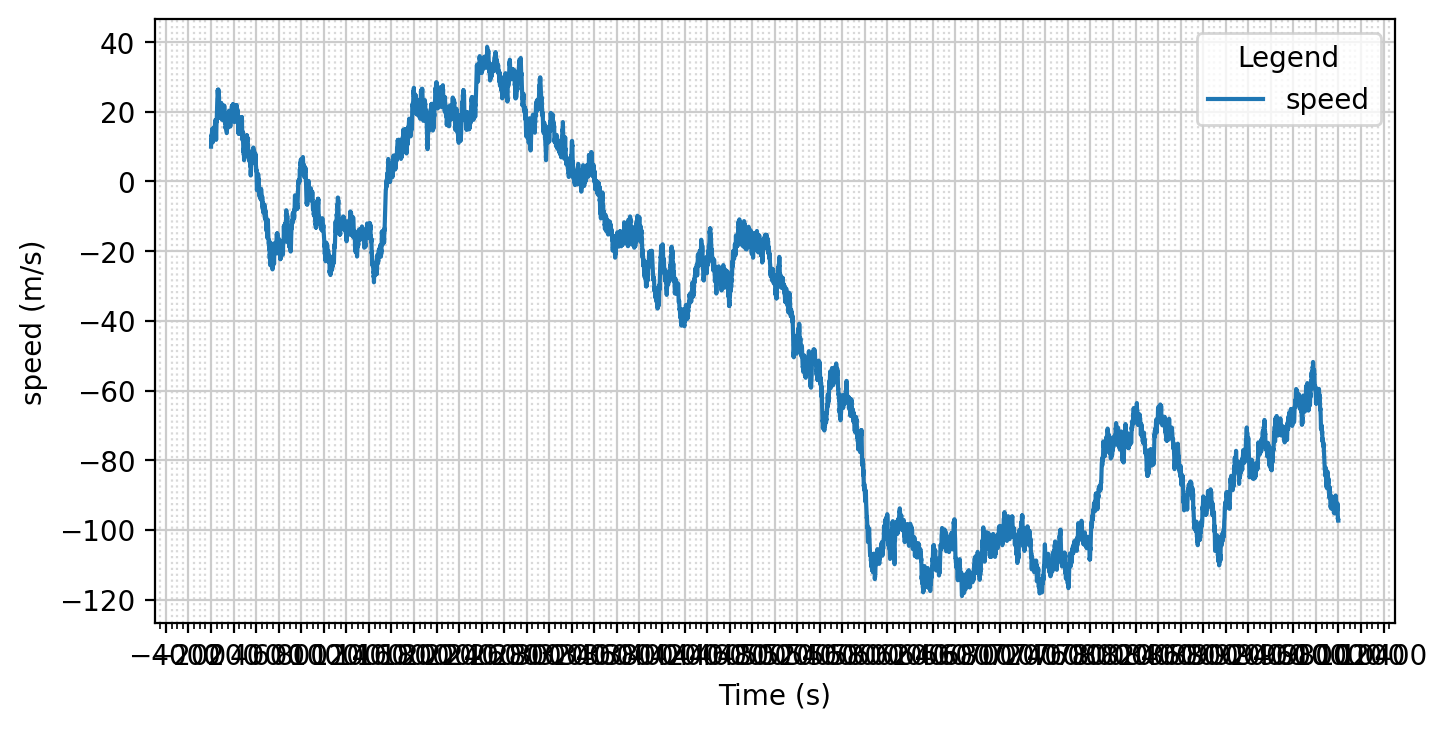

In [140]:
A = np.array([[0 ,1],[0,0]])
W= [0,0.1] 
G = np.array([[1,0],[0,1]])

B = np.diag([0,sig])


X0 = np.array([[0.0 , 10]]) # to column vector

def f(x, t):
    return A.dot(x)

def G(x, t):
    return B

print(np.squeeze(X0))


X = sdeint.itoint(f, G, np.squeeze(X0), tspan,generator=rng)

print(X)

# print(tspan)

fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot()


plt.plot(tspan, X[:,1],label="speed")

plt.gca().xaxis.set_major_locator(MultipleLocator(200))
plt.gca().xaxis.set_minor_locator(MultipleLocator(50))


plt.grid(axis='both', which='major', color='0.80',linestyle='-')
plt.grid(axis='both',which='minor', color='0.85',linestyle=':')

plt.xlabel("Time (s)")
plt.ylabel("speed (m/s)")


#plt.plot(tspan, result[:,0],label="position")
plt.legend(title="Legend")